In [4]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Standard Units

In [5]:
exams = Table.read_table('exams_fa18.csv')
exams.show(5)

Midterm,Final
91,88
89.5,84
78,71.5
87,88
72,72.5


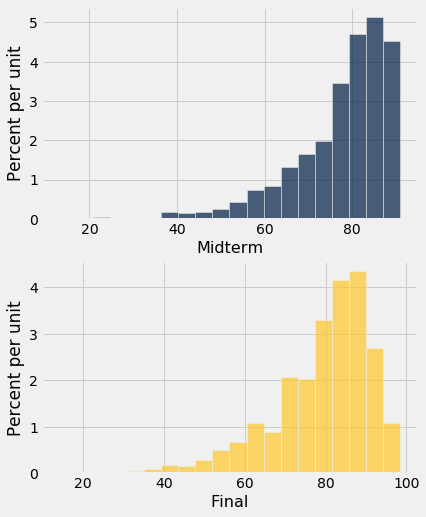

In [6]:
exams.hist(overlay=False, bins=20)

In [7]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [8]:
midterm_su = standard_units(exams.column('Midterm'))
exams = exams.with_column('Midterm in Standard Units', midterm_su)

final_su = standard_units(exams.column('Final'))
exams = exams.with_column('Final in Standard Units', final_su)

exams.show(10)

Midterm,Final,Midterm in Standard Units,Final in Standard Units
91,88,1.16278,0.717241
89.5,84,1.03032,0.390935
78,71.5,0.0147889,-0.628768
87,88,0.809552,0.717241
72,72.5,-0.515053,-0.547191
71.5,61,-0.559206,-1.48532
82,92.5,0.368017,1.08433
84.5,87,0.588784,0.635664
85,92,0.632938,1.04355
78,71,0.0147889,-0.669556


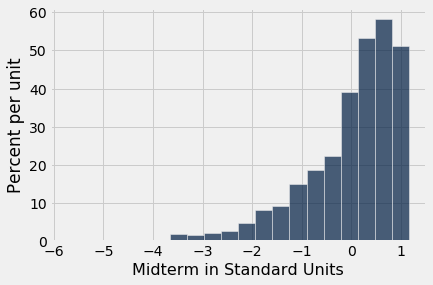

In [9]:
exams.hist('Midterm in Standard Units', bins=20)

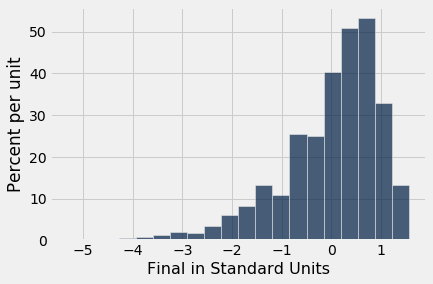

In [10]:
exams.hist('Final in Standard Units', bins=20)

## Discussion Question

In [11]:
births = Table.read_table('baby.csv')

In [12]:
ages = births.column('Maternal Age')
ages_standard_units = standard_units(ages)

In [13]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [14]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

## The SD and Bell Shaped Curves

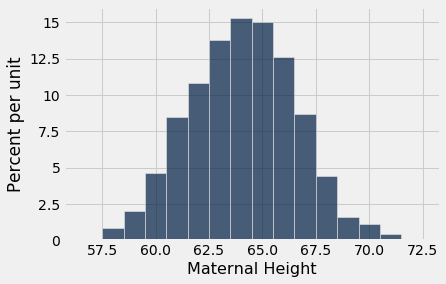

In [15]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [16]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

In [17]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

(66.57442918883797, 61.52437830690309)

## Central Limit Theorem ##

In [18]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


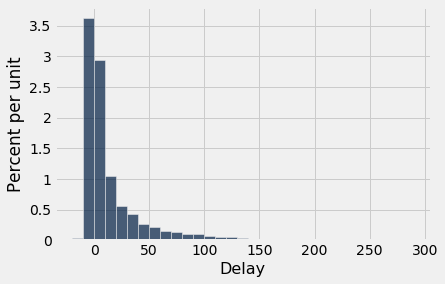

In [19]:
united.hist('Delay', bins=united_bins)

In [20]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [21]:
percentile(50, delays)

2

In [22]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [23]:
one_sample_mean(100)

19.89

In [24]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [25]:
sample_means_100 = ten_thousand_sample_means(100)

In [26]:
sample_means_100

array([15.31, 14.5 , 21.84, ..., 18.84, 15.14, 18.55])

In [27]:
len(sample_means_100)

10000

Population Average: 16.658155515370705


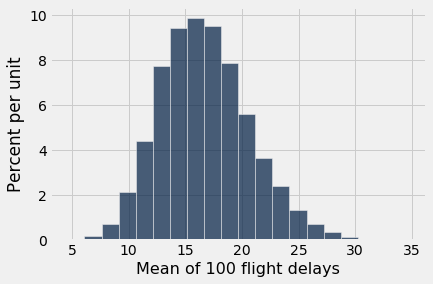

In [28]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.658155515370705


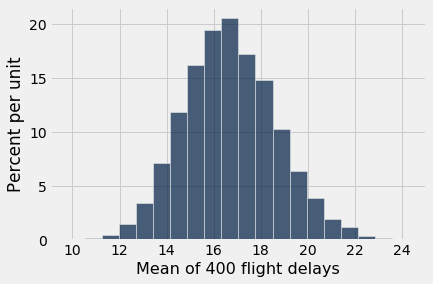

In [29]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', delay_mean)